In [307]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

# H6.1

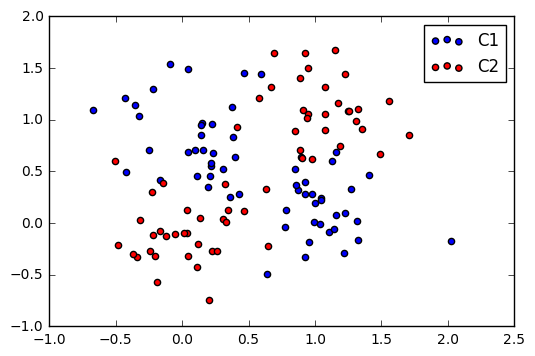

In [308]:
def generateTraining():
    variance = 0.1
    sigma = np.sqrt(variance)
    no_sample_per_class = 60
    classes = [-1,1]
    total_samples = len(classes)*no_sample_per_class
    
    x = np.concatenate((
            np.random.normal( 0, sigma, 30), # x1 for u1
            np.random.normal( 1, sigma, 30),  # x1 for u2
            np.random.normal( 0, sigma, 30),  # x1 for u3
            np.random.normal( 1, sigma, 30),  # x1 for u4
            
            np.random.normal( 1, sigma, 30),  # x2 for u1
            np.random.normal( 0, sigma, 30),  # x2 for u2
            np.random.normal( 0, sigma, 30),  # x2 for u3
            np.random.normal( 1, sigma, 30),  # x2 for u4
        ))
    x = x.reshape(2,total_samples)
    y = np.zeros(total_samples)
    y[:no_sample_per_class] = -1
    y[no_sample_per_class:] = 1
    return (x, y)

def mapColor(y):
    return [ 'r' if l == -1 else 'b' for l in y ]

def plotScatter(x,y):
    plt.scatter( x[0,:60] , x[1,:60], c='b', label="C1" )
    plt.scatter( x[0,60:] , x[1,60:], c='r', label="C2" )
    plt.legend()

training_x, training_y = generateTraining()

plotScatter(training_x, training_y)

# H6.2

In [309]:
def knn(x, y, point, classes, k=3 ):
    point = np.array(point)
    no_training = x.shape[1]
    dist = np.zeros(no_training)
    for i in range(no_training):
        dist[i] = np.linalg.norm( np.array(x[:,i])-point )
    
    sorted_dist = np.argsort(dist)
    
    nearest_neightbors = sorted_dist[:k]

    votes = np.sum(y[:,nearest_neightbors], axis=1) / k

    return classes[np.argmax(votes)]
#     for n in nearest_neightbors:
# #         print(y[n])
#         encoded_index = np.where(classes==y[n])
# #         hot_y = 
#         if y[n] ==  1:
#             v_c1 = v_c1+1
    
#     p_c1 = v_c1*1.0/k
# #     print(p_c1)
#     pred = -1
#     if p_c1 > 0.5 :
#         pred = 1

#     diff = np.abs(1-2*p_c1)
#     return (pred, diff, pred*diff )

def encode_y( y, classes ):
    size = len(y)
    encoded = np.zeros( (len(classes), size ) )
    for i in range(size):
        encoded_index = np.where(classes==y[i])
        encoded[encoded_index, i] = 1
    return encoded
    
encoded_y = encode_y( training_y, [-1,1] )

knn(training_x, encoded_y, (-0.5,1.5), [-1,1],  k=3)

-1

# H6.3

In [310]:
def predict_knn(train_x, train_y, x, k=3, classes=[-1,1]):
    size = x.shape[1];

    pred = np.zeros(size)
    ci   = np.zeros(size)
    
    for i in range(size):
        res = knn(train_x, train_y, (x[0, i], x[1,i]), classes, k )
        pred[i] = res

        
    return (pred,ci )


h = 0.02
x_min, x_max = training_x[0,:].min() - 0.5, training_x[0,:].max() + 0.5
y_min, y_max = training_x[1,:].min() - 0.5, training_x[1,:].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xx_r = xx.ravel()
yy_r = yy.ravel()
    
xx_yy = np.concatenate((xx_r, yy_r)).reshape( (2,len(xx_r)) )
(pred_1nn, _ ) = predict_knn( training_x, encoded_y, xx_yy, 1 )

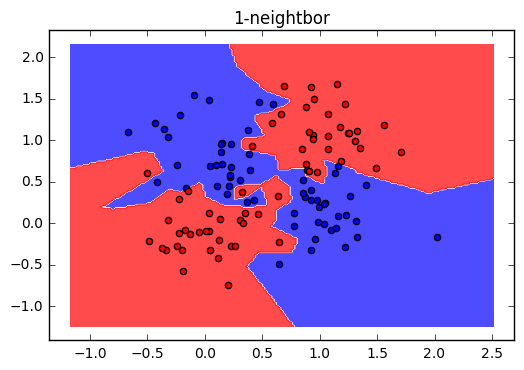

In [311]:
def plotContour( x, pred, title, colors=('b','r')):
    Z = pred.reshape(xx.shape)
    plt.contourf(xx, yy, Z,  cmap=plt.cm.bwr, alpha=0.8)
    for i in range(len(colors)):
        s = (i)*60
        n = (i+1)*60
        plt.scatter( x[0,s:n] , x[1,s:n], c= colors[i] )
    plt.title(title)

plotContour( training_x, pred_1nn, "1-neightbor")

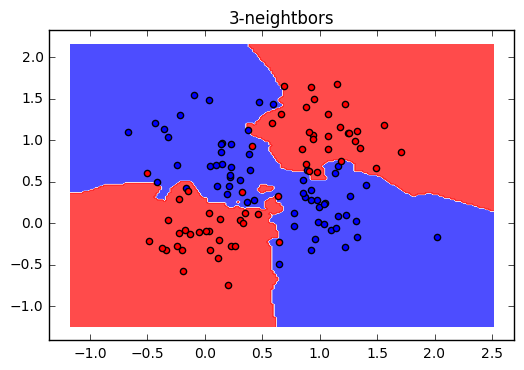

In [312]:
(pred_3nn, _ ) = predict_knn( training_x, encoded_y, xx_yy, 3 )
plotContour( training_x, pred_3nn, "3-neightbors")

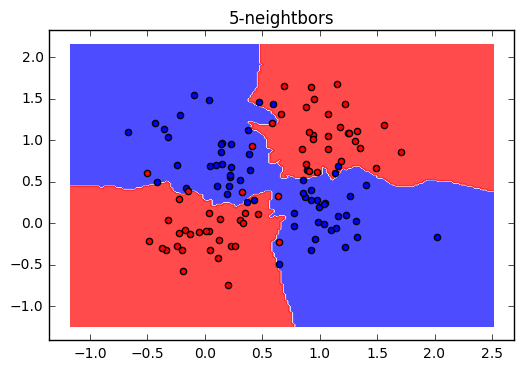

In [313]:
(pred_5nn, _ ) = predict_knn( training_x, encoded_y, xx_yy, 5 )
plotContour( training_x, pred_5nn, "5-neightbors")

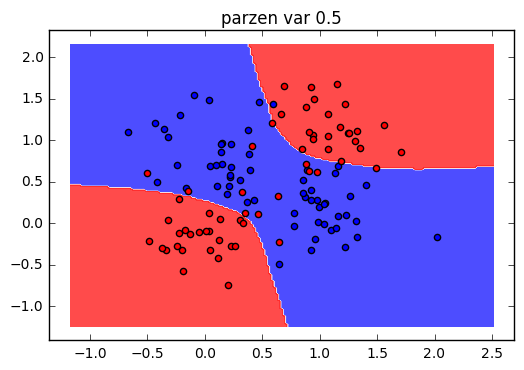

In [314]:
def pred_parzen(x, y, points, var, classes=[-1,1] ):
    no_training = x.shape[1]
    no_points = points.shape[1]

    hot_y = y
    
    pred = [0]*no_points
    for i in range(no_points):
        diff = x - points[:,i].reshape((2,1))
        norms = np.linalg.norm( diff, axis=0 )
        ks = np.exp( (-1/(2*var))* norms )
        votes = np.multiply( ks, hot_y)
        total_dist = np.sum(votes)
        p = np.sum(votes,axis=1)/total_dist

        pred[i] = classes[np.argmax(p)]
    return np.array(pred)

pred_parzen05 = pred_parzen(training_x, encoded_y, xx_yy, 0.5)
plotContour( training_x, pred_parzen05, "parzen var 0.5")

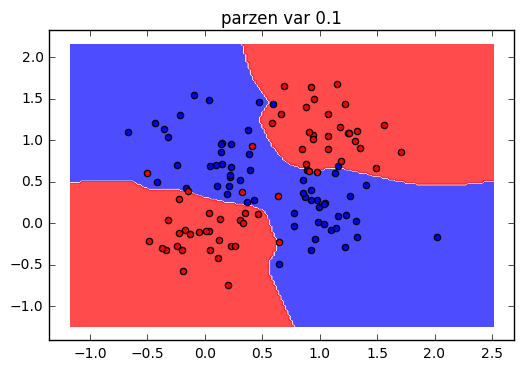

In [315]:
pred_parzen01 = pred_parzen(training_x, encoded_y, xx_yy, 0.1)
plotContour( training_x, pred_parzen01, "parzen var 0.1")

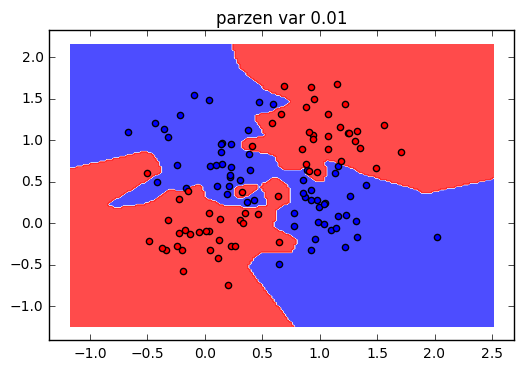

In [316]:
pred_parzen001 = pred_parzen(training_x, encoded_y, xx_yy, 0.01)
plotContour( training_x, pred_parzen001, "parzen var 0.01")

# H6.3b

In [317]:
class3_points = np.random.normal( 0.5, np.sqrt(0.05), 2*60).reshape(2,60)


print(training_x[:,0:3])


new_training_x = np.concatenate( (training_x.T, class3_points.T ) ).T
new_training_y = np.concatenate( (training_y, np.zeros(60) ) )

new_y_encoded = encode_y(new_training_y, [-1,1,0] )

print(new_y_encoded.shape)

[[ 0.46764778  0.14354562  0.11021325]
 [ 1.45718869  0.85305397  0.45287197]]
(3, 180)


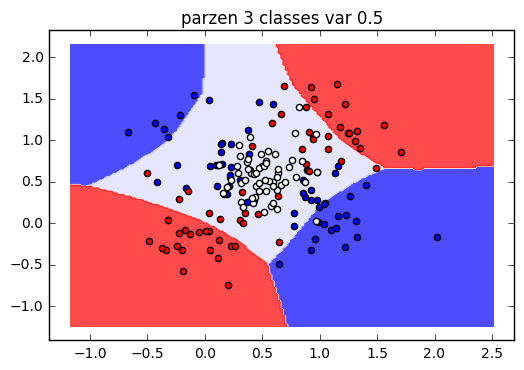

In [318]:
pred_parzen3_05 = pred_parzen(new_training_x, new_y_encoded, xx_yy, 0.5, classes=[-1,1,0])
plotContour( new_training_x, pred_parzen3_05, "parzen 3 classes var 0.5", colors=('b','r', 'w') )

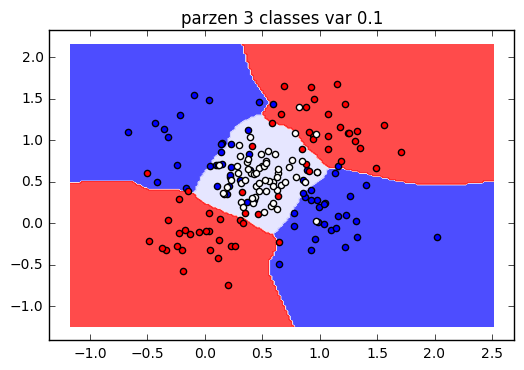

In [319]:
pred_parzen3_01 = pred_parzen(new_training_x, new_y_encoded, xx_yy, 0.1, classes=[-1,1,0])
plotContour( new_training_x, pred_parzen3_01, "parzen 3 classes var 0.1", colors=('b','r', 'w') )

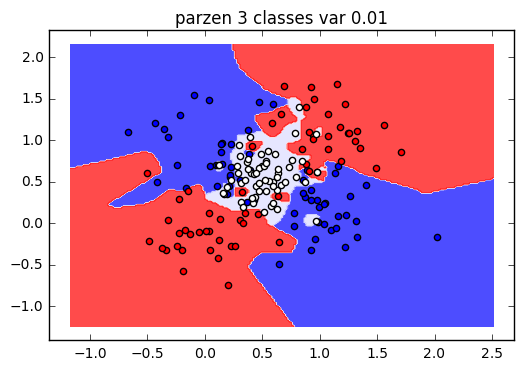

In [320]:
pred_parzen3_001 = pred_parzen(new_training_x, new_y_encoded, xx_yy, 0.01, classes=[-1,1,0])
plotContour( new_training_x, pred_parzen3_001, "parzen 3 classes var 0.01", colors=('b','r', 'w') )

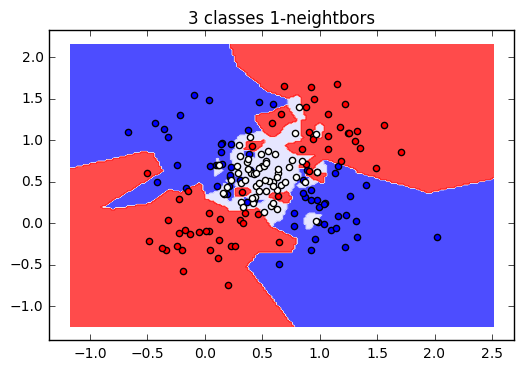

In [321]:
(pred_3c_1nn, _ ) = predict_knn( new_training_x, new_y_encoded, xx_yy, 1, classes=[-1,1,0] )
plotContour( new_training_x, pred_3c_1nn, "3 classes 1-neightbors", colors=('b','r', 'w') )

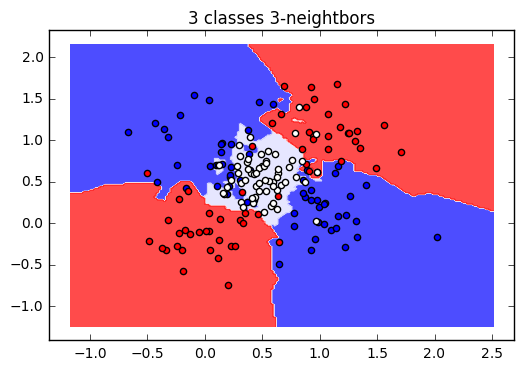

In [322]:
(pred_3c_3nn, _ ) = predict_knn( new_training_x, new_y_encoded, xx_yy, 3, classes=[-1,1,0] )
plotContour( new_training_x, pred_3c_3nn, "3 classes 3-neightbors", colors=('b','r', 'w') )

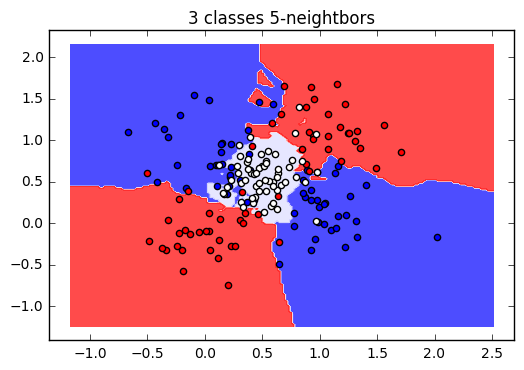

In [323]:
(pred_3c_5nn, _ ) = predict_knn( new_training_x, new_y_encoded, xx_yy, 5, classes=[-1,1,0] )
plotContour( new_training_x, pred_3c_5nn, "3 classes 5-neightbors", colors=('b','r', 'w') )

# H6.4a

In [395]:
def randomCenters(n=2):
    dim = 2
    centers = np.zeros((dim, n))
    centers[0,:] = np.random.uniform( x_min, x_max, n )
    centers[1,:] = np.random.uniform( y_min, y_max, n )
    return centers

k2_init_centers = randomCenters(2)
print(k2_init_centers)

[[ 0.9566812   1.14645148]
 [ 1.57064629  0.5679887 ]]


In [422]:
def kmean( x, centers):
    itera = 0
    no_training = x.shape[1]
    no_centers = centers.shape[1]
    while itera < 10000:
        cls_assigned = [ [] for c in range(no_centers) ]
#         print(cls_assigned)
        for i in range(no_training):
            xi = x[:,i].reshape((2,1))
#             print(xi)
            diff = centers - xi
            dist_to_centers = np.linalg.norm( diff  )
            belong_to = np.argmin(dist_to_centers)
            cls_assigned[belong_to].append(xi)
        centers = np.array(centers)
        for c in range(no_centers):
            points_in_c = np.array(cls_assigned[c])
            if len(points_in_c) == 0:
                continue 
            points_in_c = np.array(cls_assigned[c]).T[0]
            nc = np.mean(points_in_c, axis=1)
            centers[:, c] = nc
            
        itera = itera+1
    return centers
k2_mean = kmean( training_x, k2_init_centers)
print(k2_mean)

[[ 0.5410297   1.14645148]
 [ 0.49356433  0.5679887 ]]


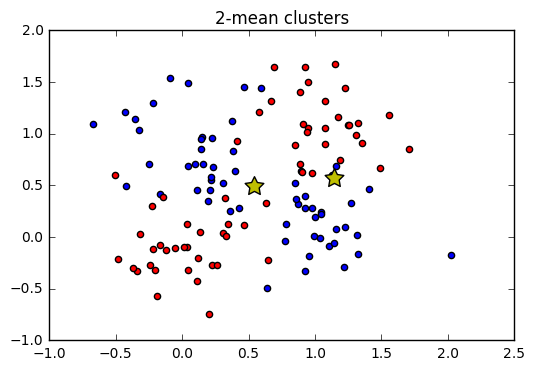

In [423]:
def plotPointsWithClusters(x, title, cluster_centers, colors=('b','r') ):
    for i in range(len(colors)):
        s = (i)*60
        n = (i+1)*60
        plt.scatter( x[0,s:n] , x[1,s:n], c= colors[i] )
    plt.scatter( cluster_centers[0,:], cluster_centers[1,:], s=200, marker=(5, 1), color="y", edgecolor="black")
    plt.title(title) 

plotPointsWithClusters(training_x, '2-mean clusters', k2_mean )

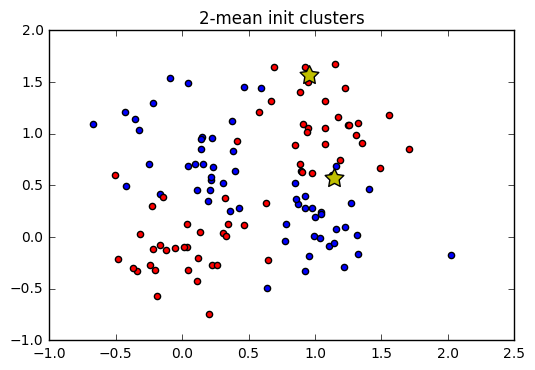

In [424]:
plotPointsWithClusters(training_x, '2-mean init clusters', k2_init_centers )

In [473]:
def compute_phi(x, rbf_centers, var):
    no_training = x.shape[1]
    no_centers = rbf_centers.shape[1]
    
    phi = np.zeros( (no_centers+1, no_training ) )
    phi[0,:]  = 1 # set bias dimension to 1

    for i in range(no_centers):
        diff = x - rbf_centers[:,i].reshape((2,1))
        norms = np.linalg.norm( diff, axis=0 )
        ks = np.exp( (-1/(2*var))* norms )
        phi[i+1,:] = ks
        
    return phi
    
def train_rbf(x, y, rbf_centers, var):
    phi = compute_phi(x, rbf_centers, var)
    inv_tr = np.linalg.pinv(phi).T
    return (np.dot(inv_tr, y), phi)

(w_c2_var_05,_) = train_rbf(training_x, training_y, k2_mean, 0.5)

# plotContour( training_x, pred_parzen05, "parzen var 0.5")

[ 0.98756302 -1.90956092 -0.12026039]


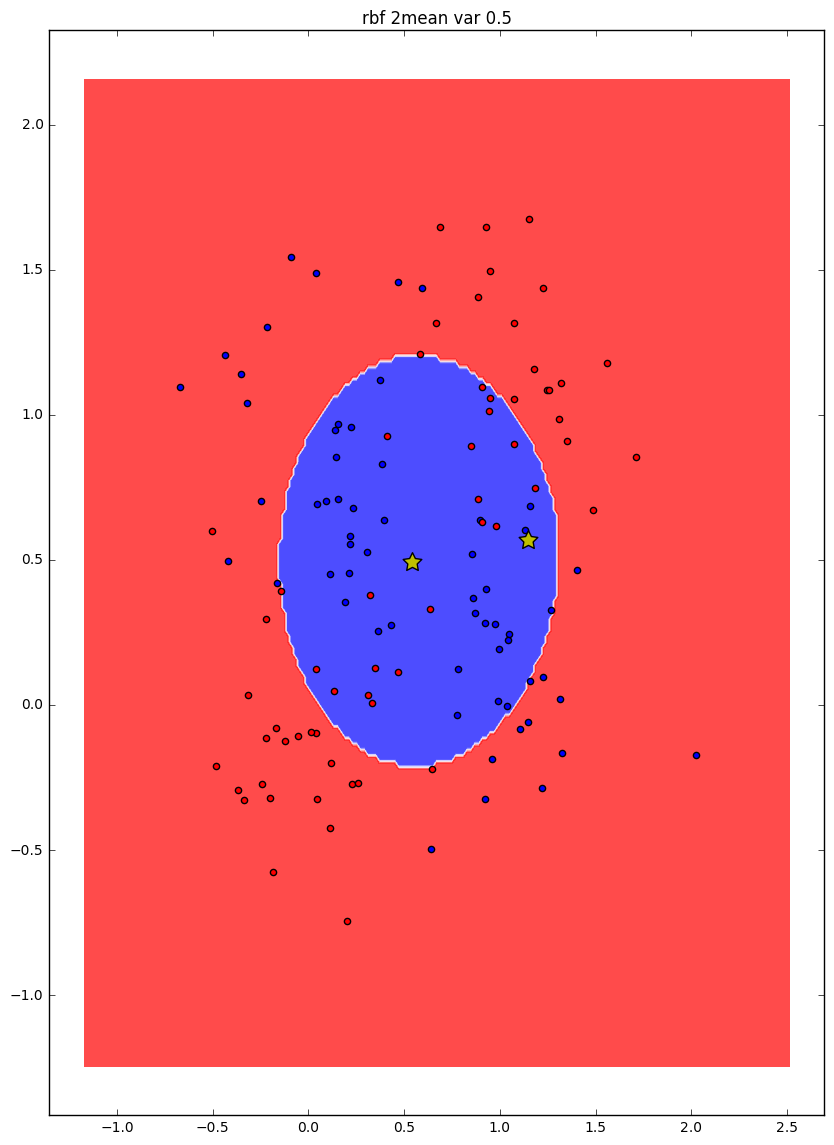

In [474]:
def pred_rbf(x, rbf_centers, var, w):
    phi = compute_phi(x, rbf_centers, var )
    
    pred = np.sign(np.dot(w, phi))
    return pred

def plotContourWithClusters( x, pred, title, cluster_centers, colors=('b','r')):
    Z = pred.reshape(xx.shape)
    plt.contourf(xx, yy, Z,  cmap=plt.cm.bwr, alpha=0.8)
    for i in range(len(colors)):
        s = (i)*60
        n = (i+1)*60
        plt.scatter( x[0,s:n] , x[1,s:n], c= colors[i] )
    plt.scatter( cluster_centers[0,:], cluster_centers[1,:], s=200, marker=(5, 1), color="y", edgecolor="black")
    plt.title(title)


pred_rbf_k2_v05 = pred_rbf(xx_yy, k2_mean, 0.5, w_c2_var_05)
plotContourWithClusters( training_x, pred_rbf_k2_v05, 'rbf 2mean var 0.5', k2_mean )

In [461]:
k3_mean = kmean( training_x, k3_init_centers)
k4_mean = kmean( training_x, k4_init_centers)

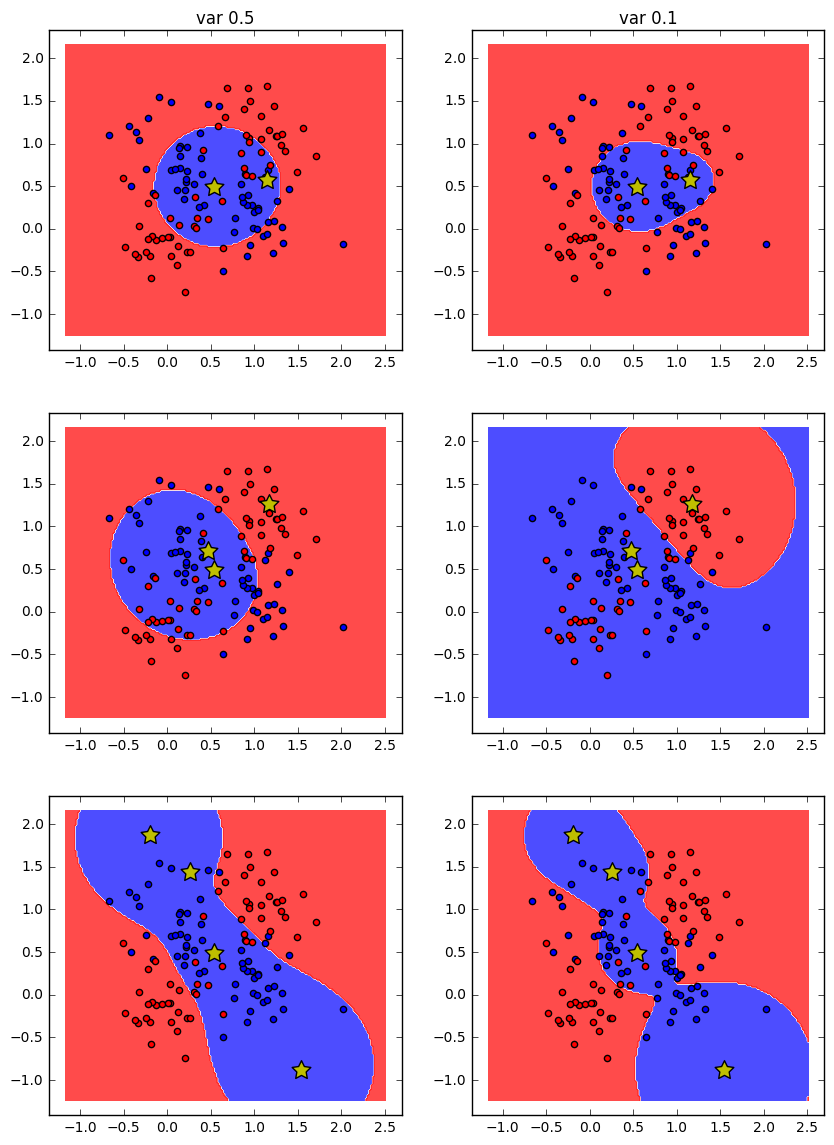

In [475]:
plt.rcParams["figure.figsize"] = [10,14]

def plotRBF( x, y, center_groups, variances, colors=['b','r'] ):
    for c in range(len(center_groups)):
        for v in  range(len(variances)):
            centers = center_groups[c]
            var = variances[v]
            (w,_) = train_rbf(x, y, centers, var)
            pred = pred_rbf(xx_yy, centers, var, w)
            Z = pred.reshape(xx.shape)
            
            plt.subplot(3,2, v+1+c*2 )
            plt.contourf(xx, yy, Z,  cmap=plt.cm.bwr, alpha=0.8)
            for i in range(len(colors)):
                s = (i)*60
                n = (i+1)*60
                plt.scatter( x[0,s:n] , x[1,s:n], c= colors[i] )
            plt.scatter( centers[0,:], centers[1,:], s=200, marker=(5, 1), color="y", edgecolor="black")
            if( c == 0):
                plt.title("var "+str(var))

plotRBF( training_x, training_y, [k2_mean, k3_mean, k4_mean], [0.5,0.1] )

# H6.4b

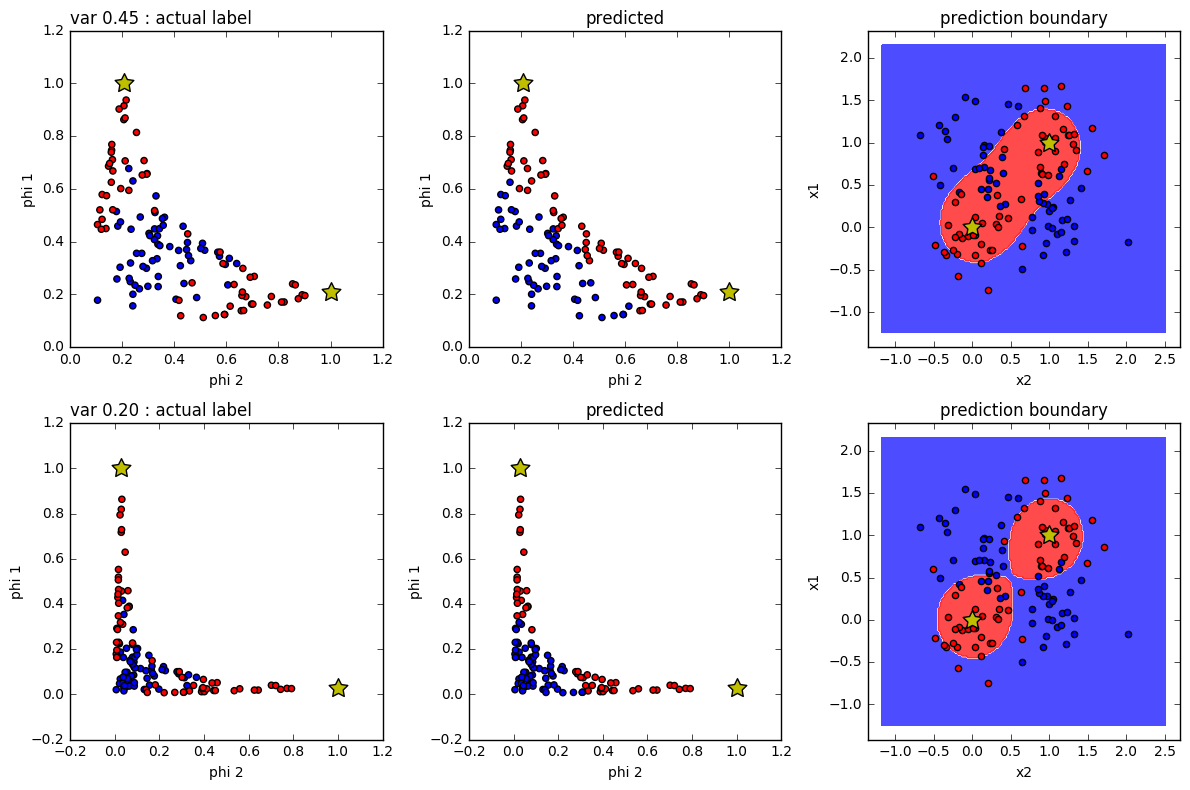

In [496]:
plt.rcParams["figure.figsize"] = [12,8]

rbf_centers = np.array([0,1,0,1]).reshape((2,2)) # 1st point at (0,0), the other at (1,1)

def plotRBFPhi( x, y, centers, variances, colors=['b','r'] ):
    for v in  range(len(variances)):
        var = variances[v]
        
        (w,phi) = train_rbf(x, y, centers, var)
        pred = pred_rbf( x, centers, var, w)
        phi_centers = compute_phi( centers, centers, var )
        for i in range(2):
            plt.subplot(2,3, v*3+i+1 )

            if i == 0 :
                c = [ 'b' if d == -1 else 'r' for d in y ]
                plt.scatter( phi[1,:] , phi[2,:], c=c )
                plt.title('var %2.2f : actual label' % var , loc='left')

            else:
                c = [ 'b' if d == -1 else 'r' for d in pred ]
                plt.scatter( phi[1,:] , phi[2,:], c=c )
                plt.title('predicted')
                
            plt.ylabel('phi 1')
            plt.xlabel('phi 2')
            plt.scatter( phi_centers[1,:], phi_centers[2,:], s=200, marker=(5, 1), color="y", edgecolor="black")

        pred = pred_rbf( xx_yy, centers, var, w)
        Z = pred.reshape(xx.shape)
        plt.subplot(2,3, v*3+3 )
        plt.ylabel('x1')
        plt.xlabel('x2')
        plt.title('prediction boundary')
        plt.contourf(xx, yy, Z,  cmap=plt.cm.bwr, alpha=0.8)
        
        for i in range(len(colors)):
            s = (i)*60
            n = (i+1)*60
            plt.scatter( x[0,s:n] , x[1,s:n], c= colors[i] )
        plt.scatter( centers[0,:], centers[1,:], s=200, marker=(5, 1), color="y", edgecolor="black")

     
    plt.tight_layout()

plotRBFPhi( training_x, training_y, rbf_centers, [0.45,0.2] )